<a href="https://colab.research.google.com/github/Surajitpan05/MiniProject_ML/blob/main/ML_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Logistic Regression
Accuracy: 0.667
F1-score: 0.737
Confusion Matrix:
 [[3 0]
 [5 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       1.00      0.58      0.74        12

    accuracy                           0.67        15
   macro avg       0.69      0.79      0.64        15
weighted avg       0.88      0.67      0.70        15



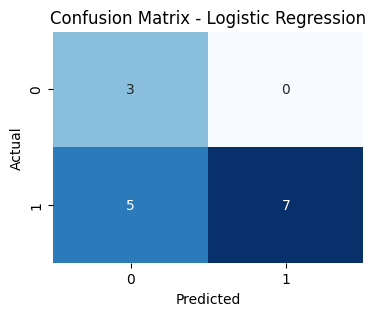


KNN
Accuracy: 0.4
F1-score: 0.571
Confusion Matrix:
 [[0 3]
 [6 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.50      0.57        12

    accuracy                           0.40        15
   macro avg       0.33      0.25      0.29        15
weighted avg       0.53      0.40      0.46        15



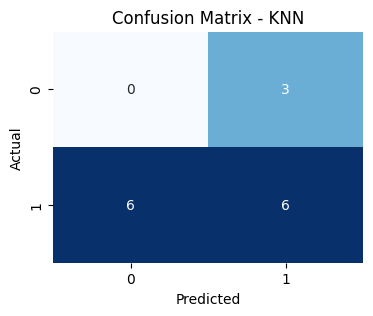

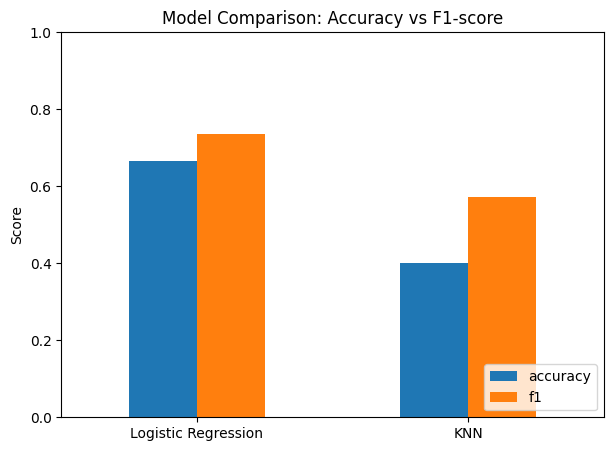

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = "/content/Data.csv"
df = pd.read_csv(file_path)

# Select relevant columns
df_small = df[[
    "Introversion extraversion",
    "Risk taking",
    "Club top1",
    "Weekly_hobby_hours   \nprovide values integer between between 0-40",
    "  Teamwork preference  \n  Like: ( 1=Prefer Solo, 5=Prefer Teams)  "
]].copy()

# Rename columns
df_small.columns = ["intro_extro", "risk_taking", "club_top1", "weekly_hobby_hours", "teamwork_pref"]

# Drop missing
df_small = df_small.dropna()

# Convert target into binary: 1–2 = Solo (0), 4–5 = Group (1), drop 3
df_small = df_small[df_small["teamwork_pref"].isin([1, 2, 4, 5])]
df_small["teamwork_pref"] = df_small["teamwork_pref"].apply(lambda x: 0 if x in [1, 2] else 1)

# Clean weekly_hobby_hours
df_small["weekly_hobby_hours"] = pd.to_numeric(df_small["weekly_hobby_hours"], errors="coerce")
df_small["weekly_hobby_hours"] = df_small["weekly_hobby_hours"].fillna(df_small["weekly_hobby_hours"].median())

# Encode categorical club_top1
le = LabelEncoder()
df_small["club_top1"] = le.fit_transform(df_small["club_top1"].astype(str))

# Features & target
X = df_small.drop("teamwork_pref", axis=1)
y = df_small["teamwork_pref"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to balance training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Store metrics
results = {}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {"accuracy": acc, "f1": f1}

    print(f"\n{name}")
    print("Accuracy:", round(acc, 3))
    print("F1-score:", round(f1, 3))
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # Plot confusion matrix heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# --- Accuracy & F1 Bar Chart ---
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind="bar", figsize=(7, 5))
plt.title("Model Comparison: Accuracy vs F1-score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
